In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib nbagg
%matplotlib inline

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (8,7)

<h1>Performance Evaluation</h1>
<p>In the present notebook we will introduce how to use different metrics to evaluate a classifier performance but also common practices when it comes to test the robustness of machine learning algorithms.</p>

<h2>Train-Test Spliting</h2>

<p>Question : how to evaluate the quality of a classifier on a dataset?
The most common approach consist in splitting the dataset in two parts (not necessarily equal) that we name the training or train set and the testing or test set.<br>
Obviously the split must be done with care!
If we end up with a train and test sets that are not representative of the original dataset our performance evaluation will be strongly biased.
For instance it can be important to respect the different classes balance within the dataset.</p>
<p>Scikit has several functions available to split a dataset in train and test sets, let's look at it in more details :</p>

In [2]:
from sklearn.datasets import load_iris

# Iris is a perfectly balanced dataset
iris = load_iris()
print('Distribution for the iris dataset :')
print(np.unique(iris.target, return_counts=True)[1])

Distribution for the iris dataset :
[50 50 50]


In [3]:
# the train_test_split() function can be found in sklearn.model_selection
from sklearn.model_selection import train_test_split

# Here I only force the train and test sets to be 50-50 of the original dataset
train_data, test_data, train_target, test_target = train_test_split(iris.data, iris.target, train_size=0.5)

print('Distribution for the train subset :')
print(np.unique(train_target, return_counts=True)[1])

Distribution for the train subset :
[29 25 21]


<p>As we can see the ```train_test_split()``` function does not protect the original frequency of each class... it only focuses on the size of the train and test sets.
Fortunately ```sklearn``` provides several functions to split my dataset forcing certain conditions (check out [here](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection) section ```sklearn.model_selection :``` __Model Selection__)...
Actually passing the dataset labels via the keyword ```stratify``` forces the class frequencies to be respected :</p>

In [4]:
# I use abbreviation here for legibility
tr_data, te_data, tr_target, te_target = train_test_split(iris.data, iris.target,
                                                          train_size=0.5, stratify=iris.target)

print('Distribution for the train subset :')
print(np.unique(tr_target, return_counts=True)[1])

Distribution for the train subset :
[25 25 25]


<p>I can already hear your question here :<br>
"Great, I know how to split my dataset to train and test it but what is a good choice for the split? 50-50? 60-30? 99-1?"<br>
And the answer is ... :<br>
"It depends"</p>
<p>There is no theoretical method or formula to tell you what is the best split to apply.
It is recommend to take train set bigger than the test set but such that the score computed on the test set stays statistically significant.
In other words make sure you have enough elements left in the test set such that accuracy, precision or recall make sense.</p>
<p>Let's run a simple example showing the influence of the train/test split on the accuracy (you can repeat the operation for the precision and the recall if you want).
For this we will use the k-Nearest Neighbors technique on the breast cancer dataset.
Instead of creating a loop to change the train/test ratio we will use directly the ```learning_curve``` function from ```sklearn``` as it is the purpose of its existence.</p>

In [5]:
from sklearn.datasets import load_breast_cancer
bcan = load_breast_cancer()

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

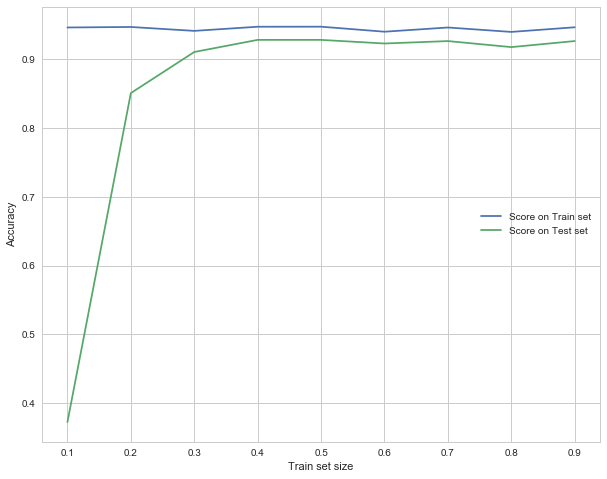

In [6]:
from sklearn.model_selection import learning_curve

n_train, train_score, test_score = learning_curve(knn, bcan.data, bcan.target,
                                                  train_sizes=np.arange(0.1,1.0,0.1))

fig, ax = plt.subplots(1,1,figsize=(10,8))
ax.plot(np.arange(0.1,1.0,0.1), np.mean(train_score, axis=1), 'C0')
ax.plot(np.arange(0.1,1.0,0.1), np.mean(test_score, axis=1), 'C1')
ax.set_xlabel('Train set size')
ax.set_ylabel('Accuracy')
ax.legend(['Score on Train set','Score on Test set'], loc=5);

<p>In that case you can see that a 50-50 split was enough but in more complex cases when the dataset is noisy and/or unbalanced you will probably need to increase the size of your training set.
Basically you will probably end up testing different train/test ratios.</p>

<h3>Other Scoring Functions : Precision, Recall and F-score</h3>
<p>Accuracy is one thing but can be biased if the dataset is very unbalanced.<br>
Fortunately there exist other scoring functions namely the __precision__, the __recall__ and the __F-score__.
The latter score actually allows to evaluate the balance between precision and recall.<br>
Let's see in practice how to compute accuracy, precision, recall and F-score in practice with ``scikit`` :</p>

In [7]:
# first let's split the breast cancer dataset in train and test sets
tr_data, te_data, tr_target, te_target = train_test_split(bcan.data, bcan.target,
                                                          train_size=0.5, stratify=bcan.target)

# then we train an algorithm on the train set...
knn = KNeighborsClassifier()
knn.fit(tr_data, tr_target)

# and ask to predict for the test set
pred_knn = knn.predict(te_data)

<p>Now we can compute the different scores (don't forget that these quantities are evaluated on the test set only):</p>

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

acc = accuracy_score(y_pred=pred_knn, y_true=te_target)
pre = precision_score(y_pred=pred_knn, y_true=te_target)
rec = recall_score(y_pred=pred_knn, y_true=te_target)
f1s = f1_score(y_pred=pred_knn, y_true=te_target)

print('Accuracy : {}'.format(acc))
print('Precision : {}'.format(pre))
print('Recall : {}'.format(rec))
print('F-score : {}'.format(f1s))

Accuracy : 0.9157894736842105
Precision : 0.9329608938547486
Recall : 0.9329608938547486
F-score : 0.9329608938547486


<p>__A little warning here__ : The breast cancer dataset includes only two classes and in this case the previous functions returns the score for only one class.
If your dataset includes more than one class you need to specify the ``average`` function used to compute the global scores (more details [here](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score)).</p>
<p>To illustrate that point let's go back to the iris dataset :</p>

In [9]:
# first let's split the breast cancer dataset in train and test sets
tr_data, te_data, tr_target, te_target = train_test_split(iris.data, iris.target,
                                                          train_size=0.5, stratify=iris.target)

# then we train an algorithm on the train set...
knn = KNeighborsClassifier()
knn.fit(tr_data, tr_target)

# and ask to predict for the test set
pred_knn = knn.predict(te_data)

# note the 'average' keyword neceassry here
# but not for accuracy which is computed globally
acc = accuracy_score(y_pred=pred_knn, y_true=te_target)
pre = precision_score(y_pred=pred_knn, y_true=te_target, average='micro')
rec = recall_score(y_pred=pred_knn, y_true=te_target, average='micro')
f1s = f1_score(y_pred=pred_knn, y_true=te_target, average='micro')

print('Accuracy : {}'.format(acc))
print('Precision : {}'.format(pre))
print('Recall : {}'.format(rec))
print('F-score : {}'.format(f1s))

Accuracy : 0.9866666666666667
Precision : 0.9866666666666667
Recall : 0.9866666666666667
F-score : 0.9866666666666668


<p>More interestingly it is possible to compute the quantities separately for each class within the dataset using some functions available with ``scikit`` (note it doesn't include the accuracy) ... </p>

In [10]:
from sklearn.metrics import precision_recall_fscore_support

pre, rec, f1s, _ = precision_recall_fscore_support(y_pred=pred_knn, y_true=te_target)

print('Precisions : {:.2f} ; {:.2f} ; {:.2f}'.format(pre[0],pre[1],pre[2]))
print('Recalls    : {:.2f} ; {:.2f} ; {:.2f}'.format(rec[0],rec[1],rec[2]))
print('F-scores   : {:.2f} ; {:.2f} ; {:.2f}'.format(f1s[0],f1s[1],f1s[2]))

Precisions : 1.00 ; 1.00 ; 0.96
Recalls    : 1.00 ; 0.96 ; 1.00
F-scores   : 1.00 ; 0.98 ; 0.98


<p>... and if you want ``scikit`` to give a full report (text report) you can also do :</p>

In [12]:
from sklearn.metrics import classification_report

report = classification_report(y_true=te_target, y_pred=pred_knn, target_names=iris.target_names)
print(report)

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        25
 versicolor       1.00      0.96      0.98        25
  virginica       0.96      1.00      0.98        25

avg / total       0.99      0.99      0.99        75



<h3>Confusion Matrix</h3>
<p>Feels like we have done a lot already?<br>
I agree but we can go even further. When doing multi-class classification we are interested in checking the algorithm confusion.
Meaning that we want to know which samples of a given class $C_i$ were mistaken for which other class $C_j$.<br>
This can be done looking at the __confusion matrix__ :</p>

In [13]:
from sklearn.metrics import confusion_matrix

# computing the confusion matrix
conf_mat = confusion_matrix(y_true=te_target, y_pred=pred_knn)
conf_mat

array([[25,  0,  0],
       [ 0, 24,  1],
       [ 0,  0, 25]])

<p>and if you want a nice visualization you can use the ``seaborn`` library :</p>

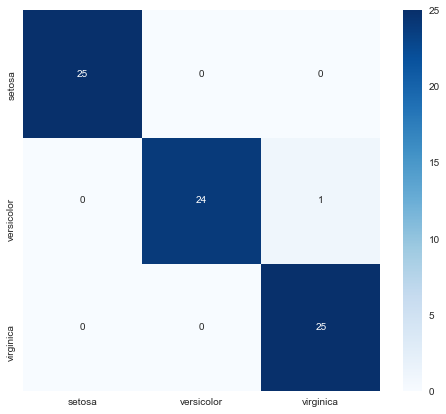

In [14]:
# visualising the confusion matrix using seaborn heatmap
labels = list(iris.target_names)
sns.heatmap(conf_mat, xticklabels=labels, yticklabels=labels,
            annot=True, fmt='d', cmap='Blues');

<p>By the way, just a little trick, it is possible to compute the accuracy on the test set from the confusion matrix directly by summing the diagonal elements and dividing the result by the sum over the whole matrix :</p>

In [33]:
sum_diag = np.sum(conf_mat.diagonal())
acc_conf_mat = sum_diag / np.sum(conf_mat)
print('Accuracy from the confusion matrix : {:.4f}'.format(acc_conf_mat))

Accuracy from the confusion matrix : 0.9867


<p>At this stage we have computed :
<ul>
<li>The global __accuracy__</li>
<li>The __precision__ globally and for each class</li>
<li>The __recall__ globally and for each class</li>
<li>The __F-score__ globally and for each class</li>
<li>The __confusion matrix__</li>
</ul>
All of these quantities give you how well/bad your algorithm performs on your dataset, up to you now to choose which aspect you want to optimize.
</p>
<p>We will have a closer look at the optimization of a classifier in another notebook...</p>